-------------------------------------------------------
================== 1.Data Selection ===================
-------------------------------------------------------

                   Formatted Date        Summary Precip Type  Temperature (C)  \
0   2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1   2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2   2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3   2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4   2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   
5   2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain         9.222222   
6   2006-04-01 06:00:00.000 +0200  Partly Cloudy        rain         7.733333   
7   2006-04-01 07:00:00.000 +0200  Partly Cloudy        rain         8.772222   
8   2006-04-01 08:00:00.000 +0200  Partly Cloudy        rain        10.822222   
9   2006-04-01 09:00:

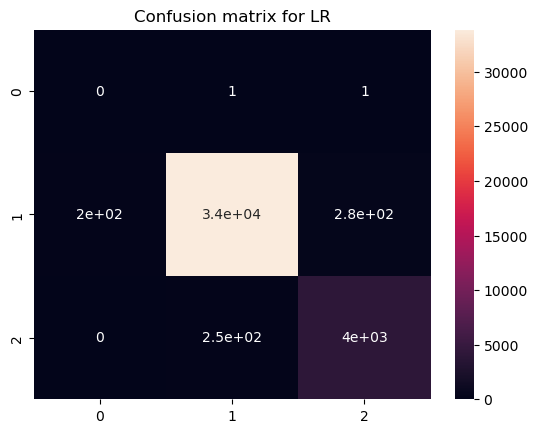

----------------------------------------
XGBOOST CLASSIFICATION --> XGB
------------------------------------

1. Accuracy = 99.72007671971386 %

              precision    recall  f1-score   support

           0       0.50      0.93      0.65       109
           1       1.00      1.00      1.00     34194
           2       1.00      1.00      1.00      4279

    accuracy                           1.00     38582
   macro avg       0.83      0.97      0.88     38582
weighted avg       1.00      1.00      1.00     38582



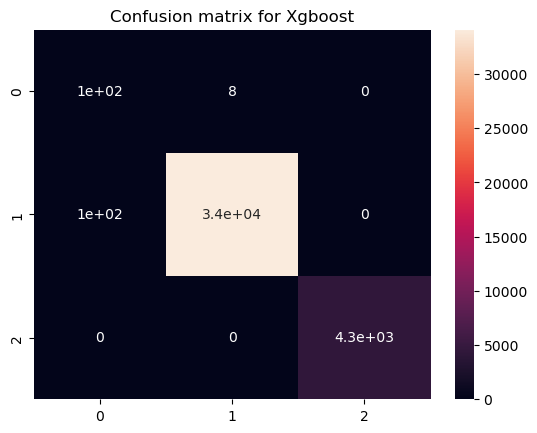

-----------------------------------------------------------
==================== Prediction ===========================
-----------------------------------------------------------

----------------------------

[0] Rain
----------------------------

[1] Rain
----------------------------

[2] Rain
----------------------------

[3] Rain
----------------------------

[4] Rain
----------------------------

[5] Rain
----------------------------

[6] Rain
----------------------------

[7] Snow
----------------------------

[8] Rain
----------------------------

[9] Rain


---------------------------------------------
================= Comaprison =================
----------------------------------------------




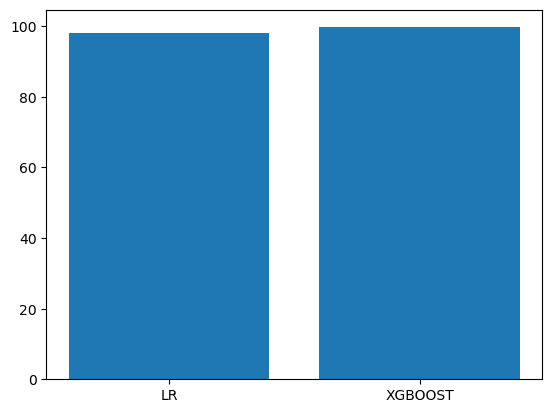

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


#===================== 1. DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("weatherHistory.csv")
print("-------------------------------------------------------")
print("================== 1.Data Selection ===================")
print("-------------------------------------------------------")
print()
print(data_frame.head(20))


#=====================  2.DATA PREPROCESSING ==========================


#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("-------------------------------------------------------------")
print("================ Before Checking missing values =========")
print("-------------------------------------------------------------")
print()
print(data_frame.isnull().sum())


print()
print("-------------------------------------------------------------")
print("================ After Checking missing values =========")
print("-------------------------------------------------------------")
print()

data_frame=data_frame.fillna(0)
print(data_frame.isnull().sum())

data_label=data_frame['Precip Type']

#=== LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("-------------------------------------------------------------")
print("==================== Before label encoding ==================")
print("------------------------------------------- ------------------")
print()
print(data_frame['Summary'].head(15))


data_frame['Summary']= label_encoder.fit_transform(data_frame['Summary'].astype(str))

data_frame['Precip Type']= label_encoder.fit_transform(data_frame['Precip Type'].astype(str))

data_frame['Daily Summary']= label_encoder.fit_transform(data_frame['Daily Summary'].astype(str))


print("-------------------------------------------------------------")
print("==================== After label encoding ==================")
print("-------------------------------------------------------------")
print()
print(data_frame['Summary'].head(15))


#=== DROP UNNECCESARY COLUMNS ===


data_frame=data_frame.drop('Formatted Date',axis=1)

#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('Precip Type',axis=1)
y=data_frame['Precip Type']


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's in dataset: ", data_frame.shape[0])
print()
print("Total No.of training data's  : ", X_train.shape[0])
print()
print("Total No.of testing data's  : ", X_test.shape[0])




#============================  5. CLASSIFICATION =============================

#==== RANDOM FOREST ====

from sklearn import linear_model


lr = linear_model.LogisticRegression()
 
lr.fit(X_train, y_train)
 
y_pred = lr.predict(X_test)

acc11=metrics.accuracy_score(y_pred,y_test)*100


cm_lr=metrics.confusion_matrix(y_pred,y_test)


print("----------------------------------------")
print("LOGISTIC REGRESSION --> LR")
print("------------------------------------")
print()
print("1. Accuracy =",acc11,'%' )
print()
print(metrics.classification_report(y_pred,y_test))

# === CONFUSION MATRIX ===

sns.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for LR")
plt.show()


# === XGBOOST ===

import xgboost as xgb

xgbb=xgb.XGBClassifier()


xgbb.fit(X_train, y_train)
 
y_pred_xg = xgbb.predict(X_test)

acc_xg=metrics.accuracy_score(y_pred_xg,y_test)*100


cm_xg=metrics.confusion_matrix(y_pred_xg,y_test)


print("----------------------------------------")
print("XGBOOST CLASSIFICATION --> XGB")
print("------------------------------------")
print()
print("1. Accuracy =",acc_xg,'%' )
print()
print(metrics.classification_report(y_pred_xg,y_test))

# === CONFUSION MATRIX ===

sns.heatmap(cm_xg, annot=True)
plt.title("Confusion matrix for Xgboost")
plt.show()



#============================  6. PREDICTION =============================

#=== PREDICT THE WEATHER ===

print("-----------------------------------------------------------")
print("==================== Prediction ===========================")
print("-----------------------------------------------------------")
print()


for i in range(0,10):
    if y_pred[i]==0:
        print("----------------------------")
        print()
        print([i],"None")
    elif y_pred[i]==1:
        print("----------------------------")
        print()
        print([i],"Rain")
    elif y_pred[i]==2:
        print("----------------------------")
        print()
        print([i],"Snow")        

print()
print()


#============================  7. COMAPRISON =============================

print("---------------------------------------------")
print("================= Comaprison =================")
print("----------------------------------------------")
print()
print()

vals=[acc11,acc_xg]
inds=range(len(vals))
labels=["LR","XGBOOST"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()
